In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df=pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/telecom_churn.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Checking the data

In [5]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
df.shape

(3333, 20)

In [7]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

In [30]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [32]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [ ]:
# Since Area Code takes only 3 values, let us treat this as a categorical feature

# Split Dependent and Independent

In [14]:
# Create a indepedent feature dataframe
X=df.drop(['churn'],axis=1)

# Create a dependent feature dataframe
Y=df[['churn']]

In [74]:
Y.mean()

churn    0.144914
dtype: float64

# Building a dataframe with Numerical Features only

In [105]:
num=X.select_dtypes(include='number')

# Dropping Area Code from Numerical Dataframe since it will be treated as a Category

In [106]:
num=num.drop(['area code'],axis=1)

# Building a dataframe with Categorical Features only

In [64]:
char=X.select_dtypes(include='object')

# Including Area Code in the Categorical Dataframe

In [65]:
area_df=X[['area code']]
char=pd.concat([char,area_df],axis=1,join="inner")

# Missing Value Check

In [33]:
num.isnull().mean()

account length            0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
dtype: float64

In [34]:
char.isnull().mean()

state                 0.0
international plan    0.0
voice mail plan       0.0
area code             0.0
dtype: float64

# Outlier Handling

In [107]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [108]:
num=num.apply(lambda x : outlier_cap(x))
num.describe(percentiles=[0.01,0.1,0.15,0.2,0.25,0.5,0.75,0.9,0.95,0.99])

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.981362,8.074707,179.792499,100.482748,30.565254,201.000852,100.129913,17.085312,200.791174,100.110447,9.035696,10.250945,4.467447,2.768269,1.557156
std,39.276205,13.622222,53.535083,19.628346,9.100850,49.821440,19.546408,4.234920,49.519955,19.223828,2.228369,2.700478,2.376841,0.729117,1.292043
min,12.320000,0.000000,51.832000,54.000000,8.813200,79.524000,53.000000,6.759200,79.428000,57.000000,3.576400,3.332000,1.000000,0.899600,0.000000
1%,12.537600,0.000000,51.853760,54.000000,8.815376,79.676320,53.000000,6.772256,79.515040,57.000000,3.580752,3.353760,1.000000,0.906128,0.000000
10%,50.000000,0.000000,110.320000,74.200000,18.754000,136.720000,75.000000,11.622000,136.340000,75.000000,6.132000,6.700000,2.000000,1.810000,0.000000
15%,60.000000,0.000000,124.300000,80.000000,21.130000,149.500000,80.000000,12.710000,148.700000,79.000000,6.690000,7.500000,2.000000,2.030000,0.000000
20%,67.000000,0.000000,134.740000,84.000000,22.908000,158.940000,84.000000,13.514000,158.600000,83.000000,7.140000,8.000000,2.400000,2.160000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000


# Encoding Categorical Independent Features

In [ ]:
# If you have a feature with N levels, you will have to create dummies or indicators for N-1 levels

In [66]:
char_encode=pd.get_dummies(char,drop_first=True)

In [60]:
char_encode.head()

,area code,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
char_encode['area_code_408']=np.where(char_encode['area code']==408,1,0)
char_encode['area_code_510']=np.where(char_encode['area code']==510,1,0)

In [68]:
char_encode.head()

,area code,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,area_code_408,area_code_510
0,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,408,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,415,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [109]:
num['total_intl_calls']=np.where(num['total intl calls']<2,2,num['total intl calls'])

In [110]:
num=num.drop(['total intl calls'],axis=1)

# Feature Discretization

In [91]:
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
X_binned=pd.DataFrame(Bins.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Bin')
X_binned.describe()

,account length_Bin,number vmail messages_Bin,total day minutes_Bin,total day calls_Bin,total day charge_Bin,total eve minutes_Bin,total eve calls_Bin,total eve charge_Bin,total night minutes_Bin,total night calls_Bin,total night charge_Bin,total intl minutes_Bin,total intl charge_Bin,customer service calls_Bin,total_intl_calls_Bin
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,4.525653,0.306031,4.501650,4.542454,4.501650,4.502250,4.562556,4.502550,4.504650,4.581158,4.508551,4.537954,4.537954,1.436244,2.990999
std,2.873120,0.647706,2.873234,2.880433,2.873234,2.874174,2.886312,2.874487,2.873231,2.876160,2.873535,2.876533,2.876533,1.040261,1.939645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,3.000000
75%,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,5.000000
max,9.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,6.000000


In [70]:
X_binned.head()

,account length_Bin,number vmail messages_Bin,total day minutes_Bin,total day calls_Bin,total day charge_Bin,total eve minutes_Bin,total eve calls_Bin,total eve charge_Bin,total night minutes_Bin,total night calls_Bin,total night charge_Bin,total intl minutes_Bin,total intl calls_Bin,total intl charge_Bin,customer service calls_Bin
0,7.0,1.0,9.0,6.0,9.0,4.0,4.0,4.0,8.0,3.0,8.0,4.0,3.0,4.0,1.0
1,5.0,1.0,3.0,8.0,3.0,4.0,5.0,4.0,8.0,5.0,8.0,9.0,3.0,9.0,1.0
2,8.0,0.0,8.0,7.0,8.0,0.0,6.0,0.0,2.0,5.0,2.0,7.0,5.0,7.0,0.0
3,3.0,0.0,9.0,0.0,9.0,0.0,2.0,0.0,4.0,2.0,4.0,0.0,6.0,0.0,2.0
4,2.0,0.0,4.0,7.0,4.0,1.0,8.0,1.0,3.0,8.0,3.0,4.0,3.0,4.0,3.0


In [92]:
X_binned=pd.concat([X_binned,Y],axis=1,join="inner")

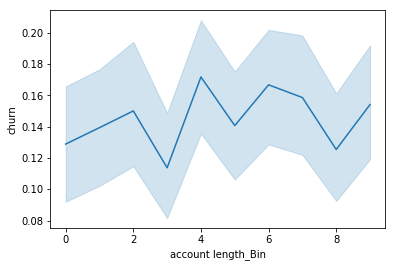

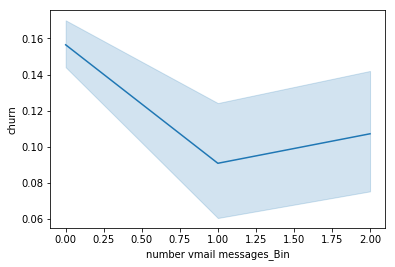

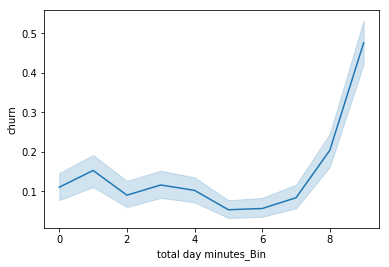

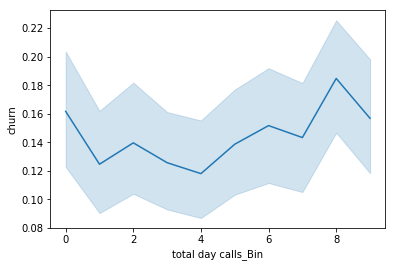

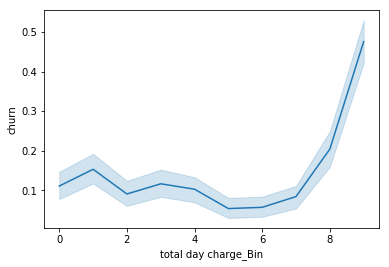

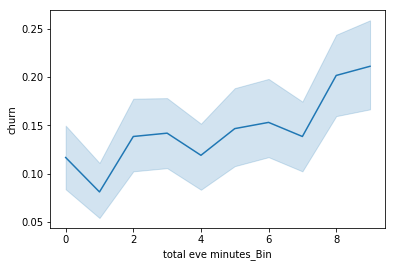

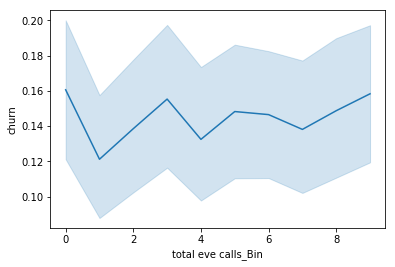

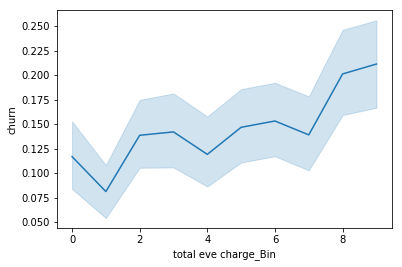

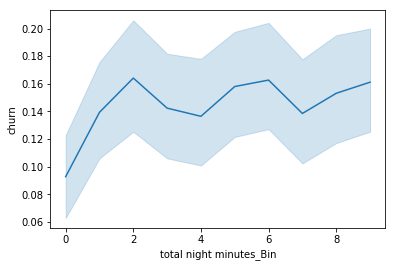

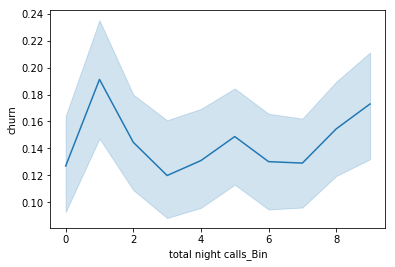

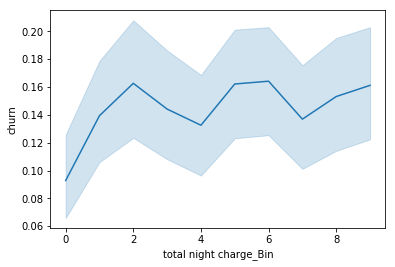

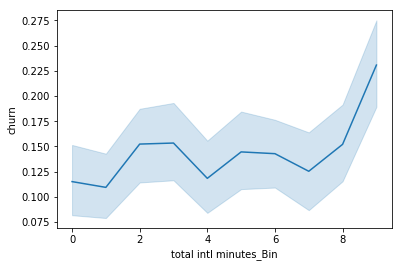

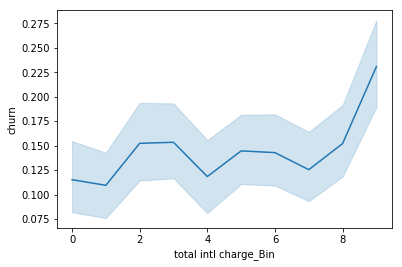

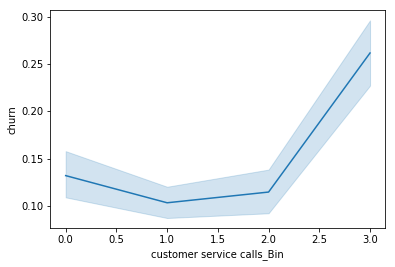

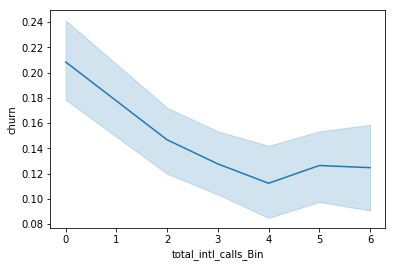

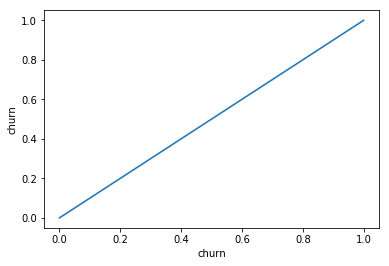

In [93]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (X_binned.columns):
    plt.figure()
    ax=sns.lineplot(x=col,y='churn',data=X_binned,estimator=mean)
    plt.show()

In [102]:
droplist=['total night charge','total night calls','total night minutes','total day calls','total eve calls','account length']

In [111]:
num=num.drop(droplist,axis=1)

In [112]:
num.dtypes

number vmail messages     float64
total day minutes         float64
total day charge          float64
total eve minutes         float64
total eve charge          float64
total intl minutes        float64
total intl charge         float64
customer service calls    float64
total_intl_calls          float64
dtype: object

In [120]:
char_feature_check=pd.concat([char,Y],axis=1,join="inner")

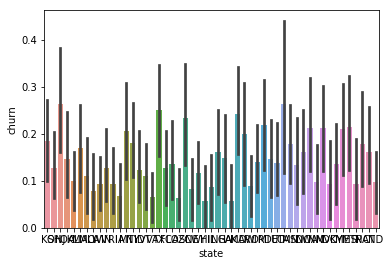

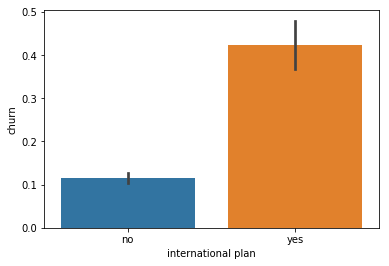

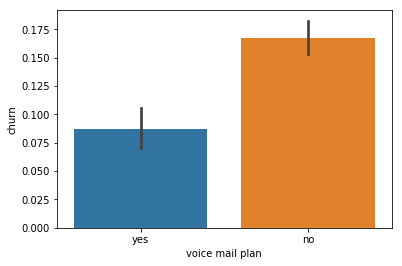

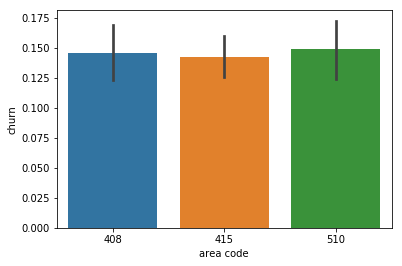

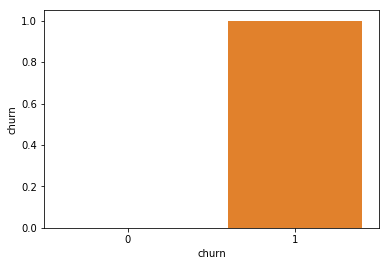

In [121]:
import matplotlib.pyplot as plt
from numpy import mean
for col in (char_feature_check.columns):
    plt.figure()
    ax=sns.barplot(x=col,y='churn',data=char_feature_check,estimator=mean)
    plt.show()

In [122]:
char_encode=char_encode.drop(['churn'],axis=1)

In [123]:
char_encode.dtypes

area code                 int64
state_AL                  uint8
state_AR                  uint8
state_AZ                  uint8
state_CA                  uint8
state_CO                  uint8
state_CT                  uint8
state_DC                  uint8
state_DE                  uint8
state_FL                  uint8
state_GA                  uint8
state_HI                  uint8
state_IA                  uint8
state_ID                  uint8
state_IL                  uint8
state_IN                  uint8
state_KS                  uint8
state_KY                  uint8
state_LA                  uint8
state_MA                  uint8
state_MD                  uint8
state_ME                  uint8
state_MI                  uint8
state_MN                  uint8
state_MO                  uint8
state_MS                  uint8
state_MT                  uint8
state_NC                  uint8
state_ND                  uint8
state_NE                  uint8
state_NH                  uint8
state_NJ

In [128]:
droplist_char=['area_code_408','area_code_510','voice mail plan_yes','area code']

In [129]:
char_encode_clean=char_encode.drop(droplist_char,axis=1)

# Create the final dataset for Model Building

In [130]:
X_all=pd.concat([num,char_encode_clean],axis=1,join="inner")

In [131]:
X_all.shape

(3333, 60)

# Train Test Split

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_all,Y, test_size=0.3,random_state=42)

# Check for randomness of train and test by testing the event rates across the two datasets

In [133]:
y_train.mean()

churn    0.145735
dtype: float64

In [134]:
y_test.mean()

churn    0.143
dtype: float64

In [135]:
X_test.shape

(1000, 60)

# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

# Making Class Predictions

In [137]:
y_pred=logreg.predict(X_test)

# Model Evaluation

In [138]:
from sklearn import metrics

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))

Accuracy: 0.859
Precision 0.5178571428571429
Recall 0.20279720279720279
f1_score 0.2914572864321608


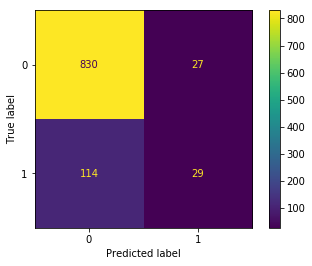

In [140]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [141]:
metrics.roc_auc_score(y_test,y_pred)

0.5856459759610284

# Visualizing the Model Performance - Lorenz Curve

In [150]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['y_pred_P']=pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=df.groupby('P_Rank')['churn'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_rank_df
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed['lift_over_random']=sorted_reindexed['cum_event_cap']/sorted_reindexed['cum_random_cap']
sorted_reindexed

,P_Rank,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile,lift_over_random
0,10,334,0.541916,181.0,181.0,0.374741,0.374741,0.10021,0.10021,1,3.739558
1,9,333,0.318318,106.0,287.0,0.219462,0.594203,0.09991,0.20012,2,2.969233
2,8,333,0.201201,67.0,354.0,0.138716,0.732919,0.09991,0.30003,3,2.442820
3,7,333,0.126126,42.0,396.0,0.086957,0.819876,0.09991,0.39994,4,2.049997
4,6,333,0.084084,28.0,424.0,0.057971,0.877847,0.09991,0.49985,5,1.756221
5,5,334,0.047904,16.0,440.0,0.033126,0.910973,0.10021,0.60006,6,1.518137
6,4,333,0.045045,15.0,455.0,0.031056,0.942029,0.09991,0.69997,7,1.345813
7,3,333,0.042042,14.0,469.0,0.028986,0.971014,0.09991,0.79988,8,1.213950
8,2,333,0.033033,11.0,480.0,0.022774,0.993789,0.09991,0.89979,9,1.104468
9,1,334,0.008982,3.0,483.0,0.006211,1.000000,0.10021,1.00000,10,1.000000


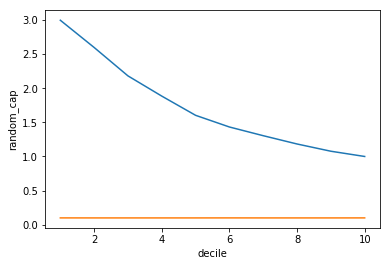

In [284]:
ax = sns.lineplot( x="decile", y="lift_over_random", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="random_cap", data=sorted_reindexed)

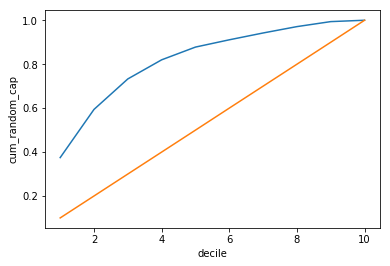

In [151]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)

In [153]:
#Average Predicted Probabilities across Deciles
df.groupby('P_Rank')['y_pred_P'].agg(['mean'])

,mean
P_Rank,
1,0.012936
2,0.026068
3,0.038627
4,0.053350
5,0.071811
6,0.097830
7,0.132503
8,0.187786
9,0.292064


In [154]:
#Average Predicted Probabilities across Deciles
df.groupby('P_Rank')['churn'].agg(['mean'])

,mean
P_Rank,
1,0.008982
2,0.033033
3,0.042042
4,0.045045
5,0.047904
6,0.084084
7,0.126126
8,0.201201
9,0.318318
